# Data Preprocessing

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import collections
from collections import Counter

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("C:\\Users\\Dell\\Downloads\\Team18\\18.csv")

In [3]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [4]:
df.shape

(2111, 17)

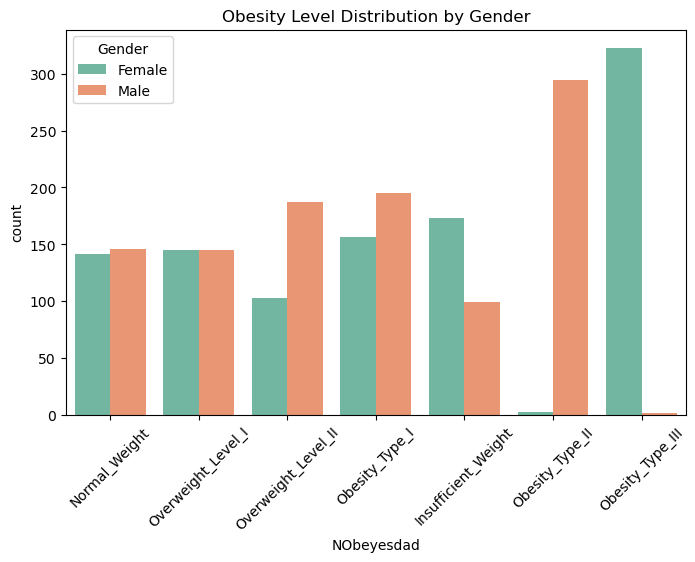

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(x="NObeyesdad", hue="Gender", data=df, palette="Set2")
plt.title("Obesity Level Distribution by Gender")
plt.xticks(rotation=45)
plt.show()

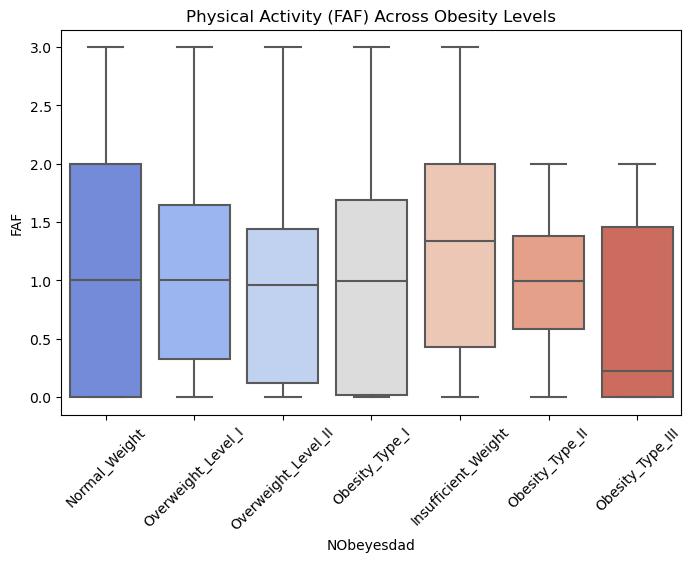

In [6]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="NObeyesdad", y="FAF", data=df, palette="coolwarm")
plt.title("Physical Activity (FAF) Across Obesity Levels")
plt.xticks(rotation=45)
plt.show()


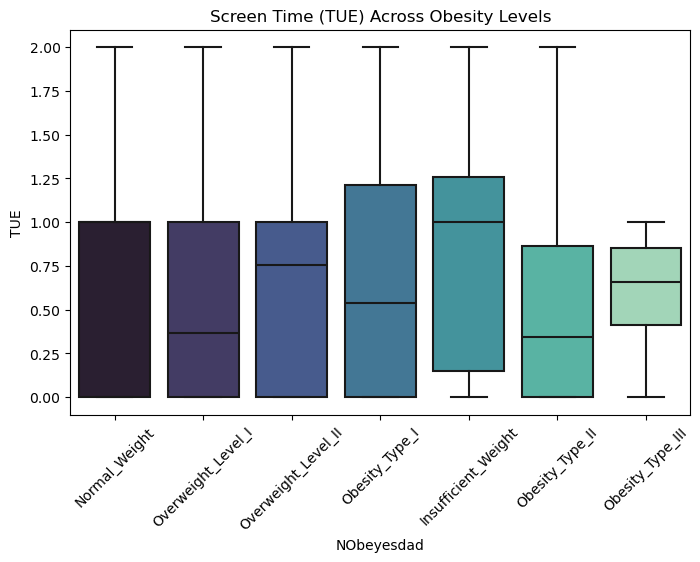

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="NObeyesdad", y="TUE", data=df, palette="mako")
plt.title("Screen Time (TUE) Across Obesity Levels")
plt.xticks(rotation=45)
plt.show()


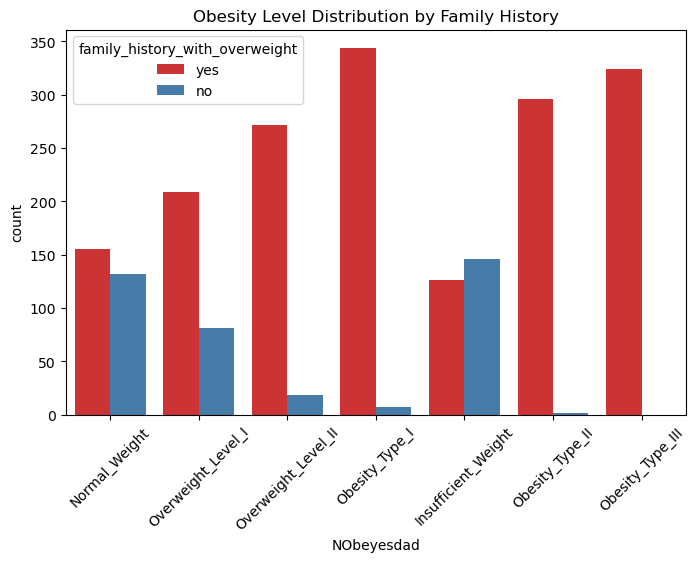

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x="NObeyesdad", hue="family_history_with_overweight", data=df, palette="Set1")
plt.title("Obesity Level Distribution by Family History")
plt.xticks(rotation=45)
plt.show()


## Outlier removal

In [9]:
import numpy as np

# Select only numerical columns
numerical_cols = ["Age", "FCVC", "NCP", "CH2O",'Height', 'Weight', "FAF", "TUE"]

# Define IQR function
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)  # First quartile (25%)
        Q3 = df[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Apply the function
df = remove_outliers_iqr(df, numerical_cols)

print("Dataset shape after IQR outlier removal:", df.shape)


Dataset shape after IQR outlier removal: (1395, 17)


## Feature Engineering: Create new interaction features

In [10]:
df["BMI"] = df["Weight"] / (df["Height"] ** 2)

# Drop Height & Weight (since BMI is more informative)
df.drop(columns=["Height", "Weight"], inplace=True)

df["Exercise_to_Screen_Ratio"] = df["FAF"] / (df["TUE"] + 1)


## ENCODING and CORRELATION HEATMAP

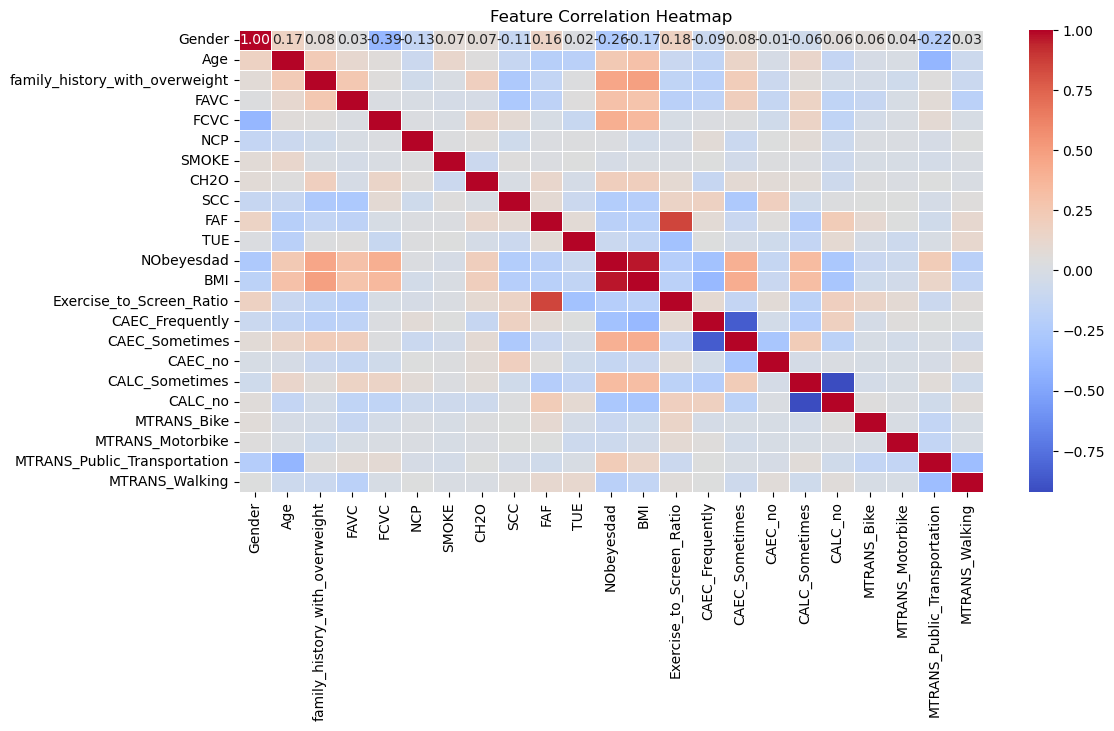

In [11]:

# Encode categorical variables
label_encoders = {}
binary_cols = ["Gender", "family_history_with_overweight", "FAVC", "SCC", "SMOKE"]
for col in binary_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


# One-Hot Encoding
one_hot_cols = ["CAEC", "CALC", "MTRANS"]
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

# Convert obesity levels to numeric
obesity_mapping = {
    "Normal_Weight": 0,
    "Overweight_Level_I": 1,
    "Overweight_Level_II": 2,
    "Obesity_Type_I": 3,
    "Obesity_Type_II": 4,
    "Obesity_Type_III": 5
}
df["NObeyesdad"] = df["NObeyesdad"].map(obesity_mapping)


correlation_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [12]:
df.columns

Index(['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'NObeyesdad', 'BMI',
       'Exercise_to_Screen_Ratio', 'CAEC_Frequently', 'CAEC_Sometimes',
       'CAEC_no', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [13]:
correlation_matrix

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,...,Exercise_to_Screen_Ratio,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
Gender,1.000000,0.168404,0.075731,0.031183,-0.389334,-0.129434,0.070085,0.072254,-0.113592,0.160123,...,0.180979,-0.093810,0.075640,-0.010601,-0.060335,0.060408,0.063364,0.041441,-0.223565,0.034139
Age,0.168404,1.000000,0.234104,0.113133,0.058397,-0.083451,0.128871,0.041020,-0.113106,-0.202096,...,-0.101300,-0.143274,0.151087,-0.015938,0.129902,-0.128590,-0.018428,-0.005284,-0.403295,-0.075189
family_history_with_overweight,0.075731,0.234104,1.000000,0.250471,0.049334,-0.051962,0.004570,0.196060,-0.260752,-0.133597,...,-0.149586,-0.184857,0.216087,-0.081905,0.059403,-0.040158,-0.033994,-0.064747,0.040706,-0.093724
FAVC,0.031183,0.113133,0.250471,1.000000,0.009940,-0.003985,-0.027196,-0.015587,-0.264414,-0.166969,...,-0.191382,-0.161903,0.200391,-0.125235,0.160852,-0.150834,-0.114770,-0.011076,0.070152,-0.180317
FCVC,-0.389334,0.058397,0.049334,0.009940,1.000000,0.019780,0.005100,0.146778,0.085791,-0.012991,...,-0.012449,0.019859,0.029429,-0.054267,0.158248,-0.150838,-0.034411,0.005419,0.091157,-0.006667
NCP,-0.129434,-0.083451,-0.051962,-0.003985,0.019780,1.000000,0.030608,0.048164,-0.061306,0.018120,...,-0.019055,0.072974,-0.090088,0.038731,0.076491,-0.074193,0.013806,0.013806,-0.017199,0.034674
SMOKE,0.070085,0.128871,0.004570,-0.027196,0.005100,0.030608,1.000000,-0.082325,0.039303,0.020592,...,0.010763,0.035864,-0.046725,0.029610,0.020350,-0.069630,-0.009576,-0.009576,-0.034762,0.007217
CH2O,0.072254,0.041020,0.196060,-0.015587,0.146778,0.048164,-0.082325,1.000000,0.000284,0.123131,...,0.096639,-0.116821,0.084401,0.072125,0.063846,-0.071034,0.031129,0.013027,0.036863,0.002000
SCC,-0.113592,-0.113106,-0.260752,-0.264414,0.085791,-0.061306,0.039303,0.000284,1.000000,0.090341,...,0.158512,0.177366,-0.254509,0.192436,-0.057742,0.028196,0.037442,0.037442,-0.026989,0.048174
FAF,0.160123,-0.202096,-0.133597,-0.166969,-0.012991,0.018120,0.020592,0.123131,0.090341,1.000000,...,0.856369,0.083191,-0.099557,0.049653,-0.216937,0.226811,0.101165,0.036502,-0.055115,0.110107


# Correlation values with Obesity levels

In [14]:
correlation_matrix["NObeyesdad"]

Gender                           -0.256774
Age                               0.242744
family_history_with_overweight    0.455952
FAVC                              0.301619
FCVC                              0.410834
NCP                               0.023147
SMOKE                            -0.019765
CH2O                              0.199031
SCC                              -0.226030
FAF                              -0.191636
TUE                              -0.089573
NObeyesdad                        1.000000
BMI                               0.966805
Exercise_to_Screen_Ratio         -0.208652
CAEC_Frequently                  -0.315998
CAEC_Sometimes                    0.400554
CAEC_no                          -0.121795
CALC_Sometimes                    0.332937
CALC_no                          -0.275156
MTRANS_Bike                      -0.096964
MTRANS_Motorbike                 -0.077636
MTRANS_Public_Transportation      0.226051
MTRANS_Walking                   -0.188714
Name: NObey

# Dropping Redundant Columns which are least correlated with the Target Variable

In [15]:
# Find features with low correlation to obesity
low_correlation_features = correlation_matrix["NObeyesdad"].abs()[correlation_matrix["NObeyesdad"].abs() < 0.1].index

# Drop them
df.drop(columns=low_correlation_features, inplace=True)
print("Dropped low-correlation features:", low_correlation_features)


Dropped low-correlation features: Index(['NCP', 'SMOKE', 'TUE', 'MTRANS_Bike', 'MTRANS_Motorbike'], dtype='object')


In [17]:
scaler = StandardScaler()
num_cols = ["Age", "FCVC", "CH2O", "FAF", "BMI", "Exercise_to_Screen_Ratio"]
df[num_cols] = scaler.fit_transform(df[num_cols])

df.to_csv("preprocessed_18.csv", index=False)

In [18]:
# Load preprocessed data
df = pd.read_csv("preprocessed_18.csv")

In [19]:
df.columns

Index(['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'CH2O', 'SCC', 'FAF', 'NObeyesdad', 'BMI', 'Exercise_to_Screen_Ratio',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'CALC_Sometimes',
       'CALC_no', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')